In [2]:
import nltk
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
url = 'https://raw.githubusercontent.com/lucascheng24/COMP4432ML-DataProduct-A_Million_News_Headlines/main/raw_data/abcnews-date-text.csv'


df = pd.read_csv(url)

headlines = df['headline_text']

In [4]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in stop_words and token not in punctuation]
    return tokens

preprocessed_headlines = [preprocess(headline) for headline in headlines]

# Convert preprocessed_headlines to a NumPy array
preprocessed_headlines_np = np.array(preprocessed_headlines)

<ipython-input-5-119452ab1f96>:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  preprocessed_headlines_np = np.array(preprocessed_headlines)


In [6]:
# Select 1/10 sample from preprocessed_headlines_np
np.random.seed(4432)
sample_size = len(preprocessed_headlines_np) // 10
sample_indices = np.random.choice(len(preprocessed_headlines_np), sample_size, replace=False)
sample_headlines_np = preprocessed_headlines_np[sample_indices]

print(sample_headlines_np)

[list(['govt', 'urged', 'release', 'sustainability', 'grants'])
 list(['whatmore', 'names', 'side', 'one', 'dayers'])
 list(['driverless', 'cars', 'adelaide', 'trials', 'closer', 'according', 'raa'])
 ... list(['reserve', 'reopens', 'blaze'])
 list(['american', 'protests', 'islamic', 'law'])
 list(['bbc', 'eyes', 'music', 'download', 'business'])]


In [9]:
len(sample_headlines_np)

124418

In [7]:
for headline in sample_headlines_np[0:10]:
  print(headline)

['govt', 'urged', 'release', 'sustainability', 'grants']
['whatmore', 'names', 'side', 'one', 'dayers']
['driverless', 'cars', 'adelaide', 'trials', 'closer', 'according', 'raa']
['star', 'wars', 'quiz', 'test', 'knowledge', 'galaxy', 'far', 'far', 'away']
['student', 'success', 'ascribed', 'support', 'network']
['galarrwuy', 'yunupingu', 'awarded', 'honorary', 'doctorate', 'garma', 'festival']
['tsunami', 'kills', 'least', '8', 'malaysia']
['date', 'draft', 'basin', 'plan']
['mining', 'town', 'suffering', 'damage', 'destruction', 'vacant', 'houses']
['roberts', 'welcomes', 'dog', 'eat', 'dog', 'test']


In [8]:
preprocessed_headlines_str = [' '.join(sublist) for sublist in sample_headlines_np]
for headline in preprocessed_headlines_str[0:10]:
  print(headline)

govt urged release sustainability grants
whatmore names side one dayers
driverless cars adelaide trials closer according raa
star wars quiz test knowledge galaxy far far away
student success ascribed support network
galarrwuy yunupingu awarded honorary doctorate garma festival
tsunami kills least 8 malaysia
date draft basin plan
mining town suffering damage destruction vacant houses
roberts welcomes dog eat dog test


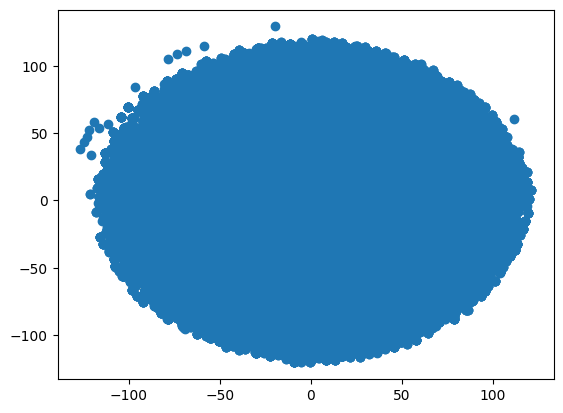

In [10]:
# Create a TF-IDF vectorizer to convert the headlines to vectors
vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(preprocessed_headlines_str)

# Apply t-SNE to reduce the dimensionality of the vectors to 2D
tsne = TSNE(n_components=2, perplexity=5, random_state=42, init="random")
X_tsne = tsne.fit_transform(X)

# Plot the 2D projection of the headlines
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.show()